# Chromakey

![chromakey](https://www.vfx-courses.com/wp-content/uploads/2018/07/Vfx.jpg)
Chroma keying is a technique used for combining two frames or images by replacing a color or a color range in one frame with that from the another frame.

It is often used in film industry to replace a scene's background by using a blue or green screen as the initial background and placing the actor in the foreground. The principle behind chroma keying is that the color blue is the opposite color of skin tone, so a distinction between the two is very clear, making it easier to select the color without worrying about any part of the actor being included in the selection. The whole blue selection is then replaced with another frame as the background.

![chromakey](http://petlif-ufscar.com/wp-content/uploads/2018/Artigos/efeitos_visuais/texto3/CinePop-b.jpg)

Chroma key is also known as color keying and color separation overlay; it is also commonly called blue screen or green screen.



## Let's implement it using python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
# Read in the image
image = cv2.imread('images/superman-chromakey.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (365, 650, 3)


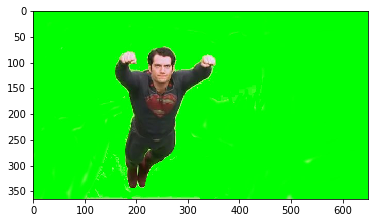

In [3]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

In [11]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,200,0]) 
upper_blue = np.array([220,255,220])

### Create a mask

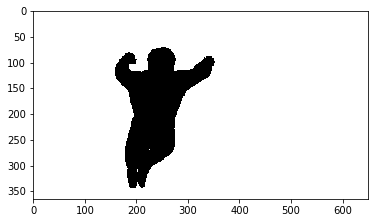

In [12]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

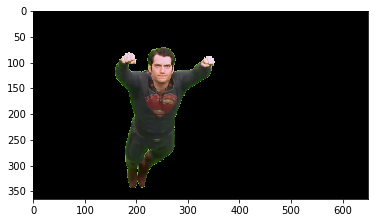

In [13]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### Mask and add a background image

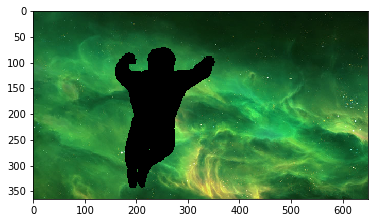

In [21]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/green_space.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
background_image.shape
# Crop it to the right size (514x816)
crop_background = background_image[50:50+365, 50:50+650]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# # Display the background
plt.imshow(crop_background)

### Create a complete image

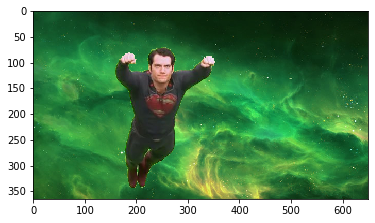

In [22]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)